In [1]:
suppressMessages(library(ggView))
suppressMessages(library(MAGeCKFlute))
suppressMessages(library(ggplot2))
suppressMessages(library(ggvenn))
suppressMessages(library(ComplexHeatmap))
options(stringsAsFactors = FALSE)

In [2]:
preds = readRDS("data/Predictions.rds")
preds = preds[order(-preds$MAPD.score), ]
FeatureDat = readRDS("data/Features_Imputed.rds")
Degradability = readRDS("data/Donovan_Degradability.rds")
Degradability = Degradability[Degradability$IsKinase, ]
Kinases = rownames(preds)[preds$IsKinase=="Yes"]
PROTAC = rownames(preds)[preds$PROTACdb=="Yes" | preds$PROTACpedia=="Yes"]

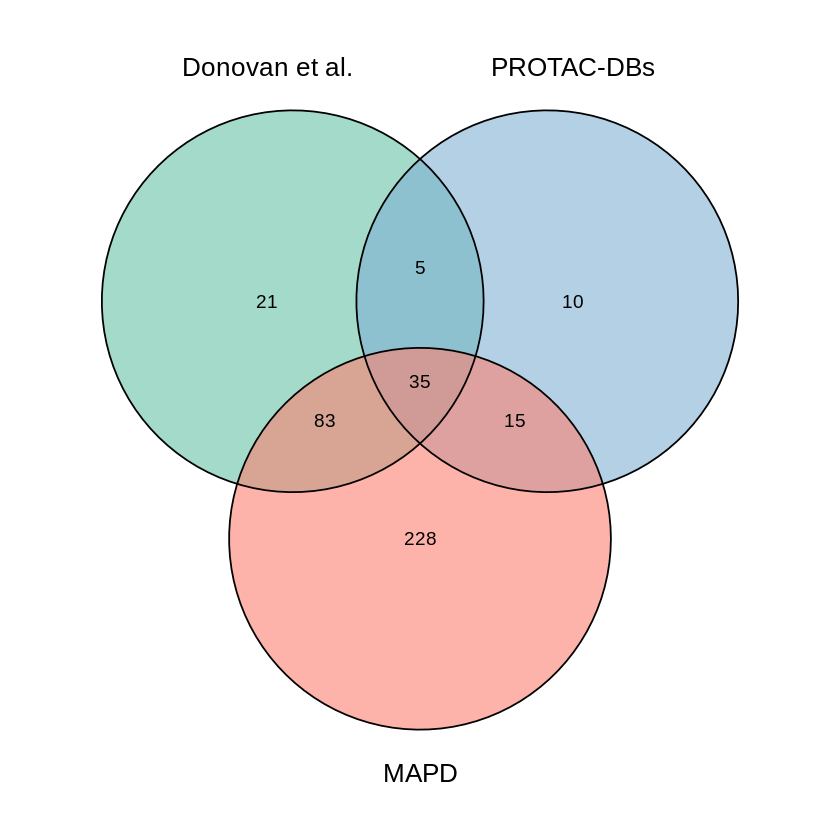

In [3]:
DegradableKinase1 = intersect(Degradability$Gene[Degradability$UniqDegradeFreq>0], Kinases)
DegradableKinase2 = intersect(PROTAC, Kinases)
DegradableKinase3 = rownames(preds)[preds[,1]>=0.2327 & preds$IsKinase=="Yes"]
gg = list(DegradableKinase1 = DegradableKinase1, DegradableKinase2 = DegradableKinase2,
          DegradableKinase3 = DegradableKinase3)
names(gg) = c("Donovan et al.", "PROTAC-DBs", "MAPD")
p = ggvenn(gg, fill_color = c("#66c2a5", "#80b1d3", "#fb8072"), show_percentage = FALSE,
           stroke_size = 0.5, set_name_size = 5.5, fill_alpha = 0.6)
p

In [4]:
gg = preds[rownames(preds)%in%Kinases, ]
gg = as.data.frame(gg)
gg$Gene = rownames(gg)
gg = merge(gg, Degradability[,-c(3,9)], by = "Gene")
gg$DetectFreq = gg$DetectFreq / max(gg$DetectFreq)
gg = gg[gg$DetectFreq>0, ]
gg$Degradability = "Not degraded"
gg$Degradability[gg$UniqDegradeFreq>0] = "Degraded"
dim(gg)
head(gg)

[1] 467  23

,Gene,MAPD.score,Feature.completeness,Max.degradation,Uniq.DegradeFreq,IsKinase,PROTACdb,PROTACpedia,Multi.kinase.degrader,PROTACtable,⋯,TF,Oncogene,Clinvar,DetectFreq,MinLFC,UniqDegradeFreq,UniqMinLFC,CRBNDetectFreq,CRBNDegradeFreq,Degradability
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,AAK1,0.17560,1.0000000,3.3417229,20,Yes,No,Yes,Yes,Yes,⋯,No,No,No,1.00000000,3.3417229,20,3.3417229,66,17,Degraded
2,AATK,0.50075,0.5075409,0.1431963,0,Yes,No,No,No,No,⋯,No,No,No,0.03311258,0.1431963,0,0.1431963,4,0,Not degraded
3,ABL1,0.66210,0.7195016,1.7346648,8,Yes,Yes,Yes,Yes,Yes,⋯,No,No,Yes,0.84768212,1.7346648,8,1.8425816,61,8,Degraded
4,ABL2,0.80875,0.7195016,2.8000860,13,Yes,No,No,Yes,Yes,⋯,No,No,No,0.72847682,2.8000860,13,3.7055463,49,12,Degraded
5,ABR,0.33895,1.0000000,0.6445624,0,Yes,No,No,No,No,⋯,No,No,No,0.97350993,0.6445624,0,0.5820419,63,0,Not degraded
6,ACTR2,0.58455,1.0000000,0.1145886,0,Yes,No,No,No,No,⋯,No,No,No,0.98675497,0.1145886,0,0.1145886,66,0,Not degraded


`geom_smooth()` using formula 'y ~ x'



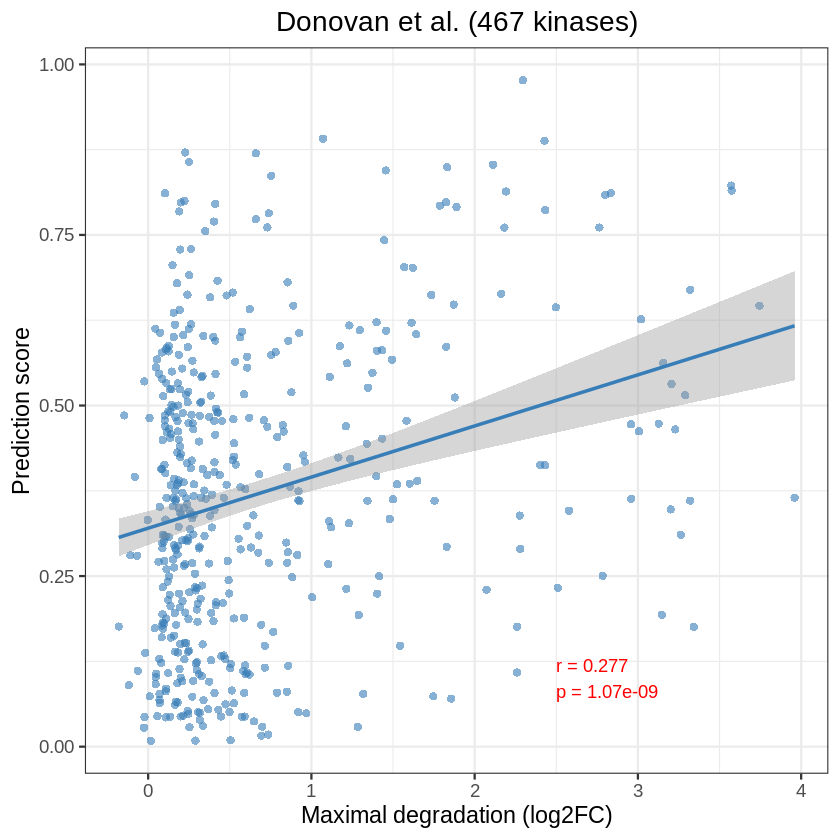

In [5]:
test = cor.test(gg$MinLFC, gg$MAPD.score)
p1 = ScatterView(gg, "MinLFC", "MAPD.score", label = "Gene", color = "#377eb8", size = 2,
                 xlab = "Maximal degradation (log2FC)", ylab = "Prediction score", 
#                  x_cut = -1, y_cut = 0.5, groups = c("bottomleft", "topleft"), top = 8,
                 main = paste0("Donovan et al. (", nrow(gg), " kinases)"))
p1 = p1 + geom_smooth(method = "lm", se = TRUE)
p1 = p1 + annotate("text", x = 2.5, y = 0.1, hjust = 0, color = "red",
                    label = paste0("r = ", round(test$estimate, 3),
                                   "\np = ", format(test$p.value, digits = 3)))
p1 = p1 + theme_bw(base_size = 14)
p1 = p1 + theme(plot.title = element_text(hjust = 0.5), legend.position = "none")
p1

`geom_smooth()` using formula 'y ~ x'



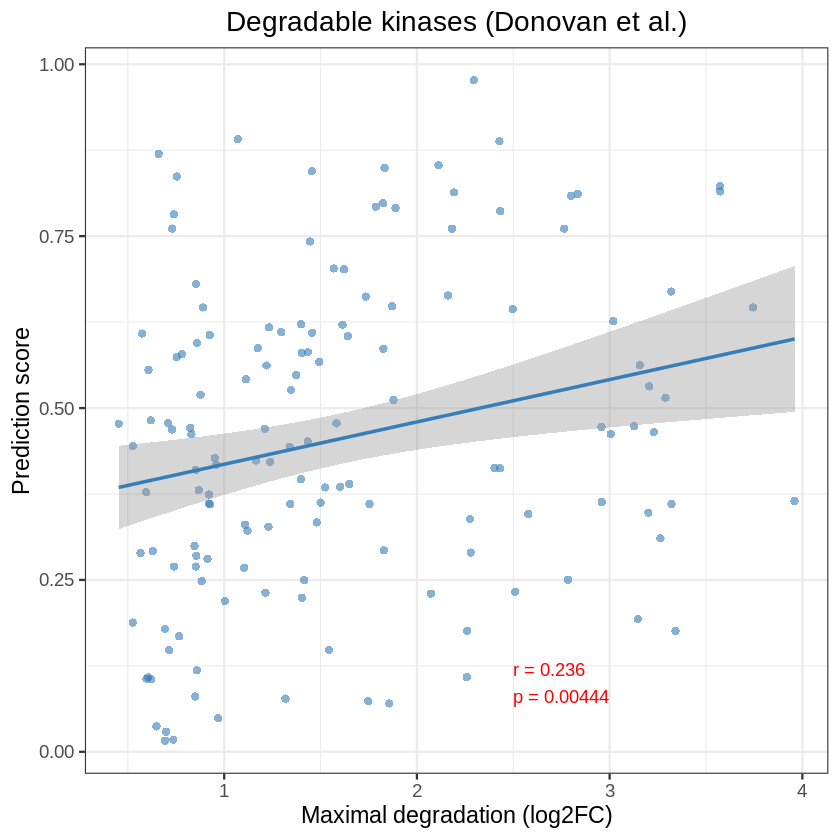

In [6]:
gg2 = gg[gg$Degradability=="Degraded", ]
test = cor.test(gg2$MinLFC, gg2$MAPD.score)
p2 = ScatterView(gg2, "MinLFC", "MAPD.score", label = "Gene", color = "#377eb8", size = 2,
                 xlab = "Maximal degradation (log2FC)", ylab = "Prediction score", 
                 main = paste0("Degradable kinases (Donovan et al.)"))
p2 = p2 + geom_smooth(method = "lm", se = TRUE)
p2 = p2 + annotate("text", x = 2.5, y = 0.1, hjust = 0, color = "red",
                    label = paste0("r = ", round(test$estimate, 3),
                                   "\np = ", format(test$p.value, digits = 3)))
p2 = p2 + theme_bw(base_size = 14)
p2 = p2 + theme(plot.title = element_text(hjust = 0.5), legend.position = "none")
p2

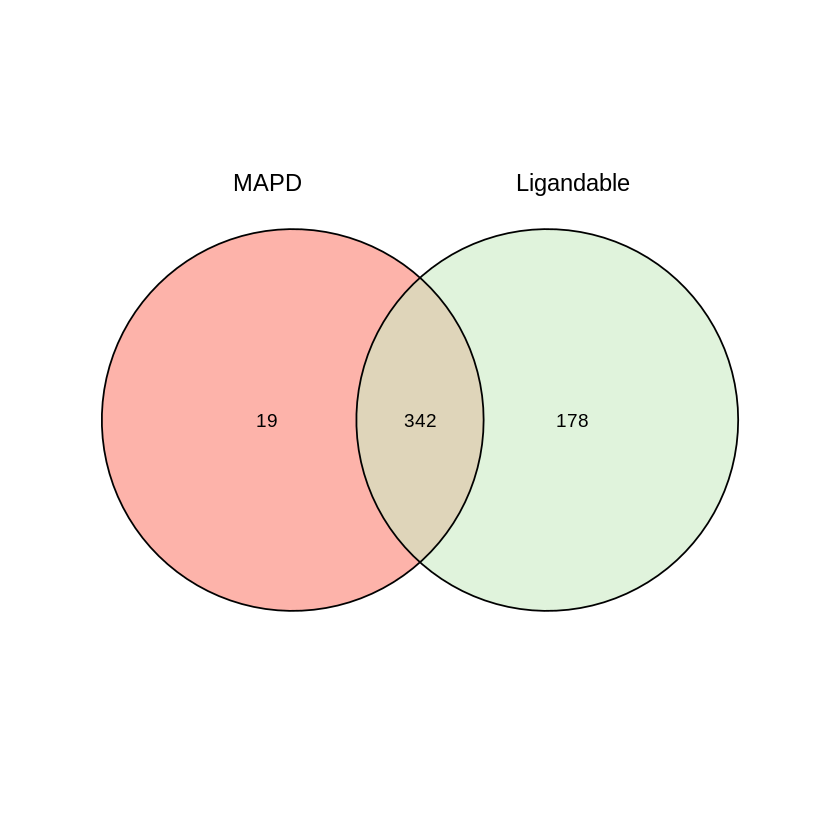

In [7]:
MAPD = rownames(preds)[preds[,1]>=0.2327 & preds$IsKinase=="Yes"]
ChEMBL = rownames(preds)[preds$ChEMBL=="Yes" & preds$IsKinase=="Yes"]
SLCABPP = rownames(preds)[preds$Electrophiles>0 & preds$IsKinase=="Yes"]
DrugBank = rownames(preds)[preds$DrugBank=="Yes" & preds$IsKinase=="Yes"]
Donovan = intersect(Degradability$Gene[Degradability$DegradeFreq>0], Kinases)

gg = list(MAPD = MAPD, Ligandable = unique(c(ChEMBL, SLCABPP, Donovan, DrugBank)))
p = ggvenn(gg, fill_color = c("#fb8072", "#ccebc5"), show_percentage = FALSE,
           stroke_size = 0.5, set_name_size = 5, fill_alpha = 0.6)
p

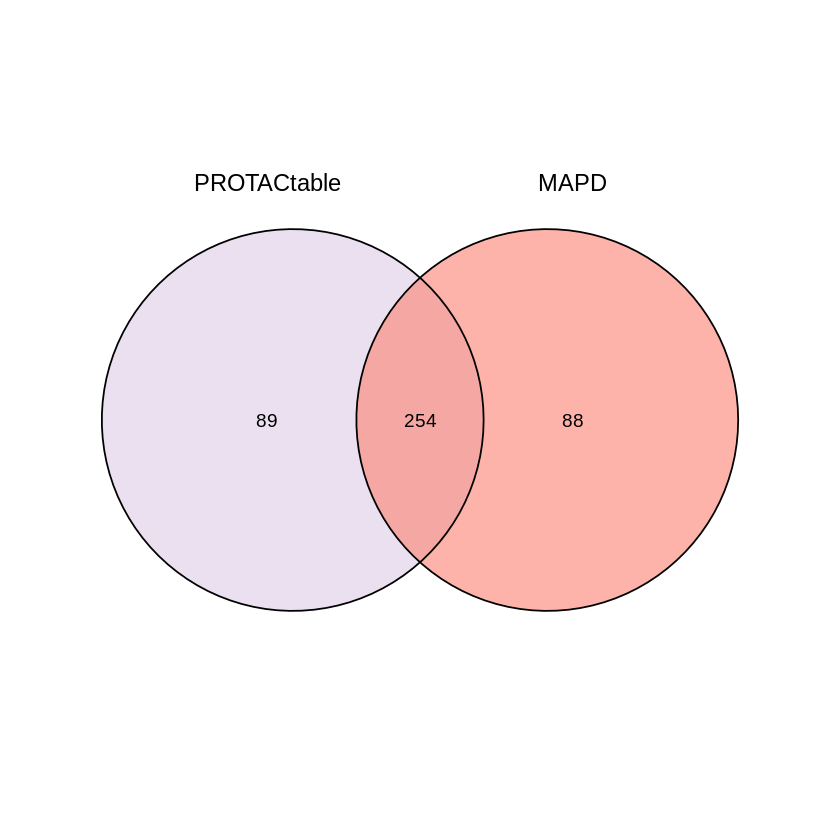

In [8]:
idx = preds$ChEMBL=="Yes"|preds$Electrophiles>0|preds$DegradeFreq>0|preds$DrugBank=="Yes"
MAPD = rownames(preds)[preds[,1]>=0.2327 & preds$IsKinase=="Yes"]
PROTACtable = rownames(preds)[preds$PROTACtable=="Yes" & preds$IsKinase=="Yes"]
ChEMBL = rownames(preds)[preds$ChEMBL=="Yes" & preds$IsKinase=="Yes"]
SLCABPP = rownames(preds)[preds$Electrophiles>0 & preds$IsKinase=="Yes"]
DrugBank = rownames(preds)[preds$DrugBank=="Yes" & preds$IsKinase=="Yes"]
Donovan = intersect(Degradability$Gene[Degradability$DegradeFreq>0], Kinases)
Ligandable = unique(c(ChEMBL, SLCABPP, Donovan, DrugBank))
MAPD = intersect(MAPD, Ligandable)
PROTACDB = rownames(preds)[(preds$PROTACdb=="Yes"|preds$PROTACpedia=="Yes") & preds$IsKinase=="Yes"]

gg = list(PROTACtable = PROTACtable, MAPD = MAPD)
p = ggvenn(gg, fill_color = c("#decbe4", "#fb8072"), show_percentage = FALSE,
           stroke_size = 0.5, set_name_size = 5, fill_alpha = 0.6)
p

Warning message in if (is.na(fill)) boo2 = TRUE:
“the condition has length > 1 and only the first element will be used”
Warning message in if (fill %in% colnames(gg)) p = p + geom_boxplot(aes_string(fill = fill), :
“the condition has length > 1 and only the first element will be used”


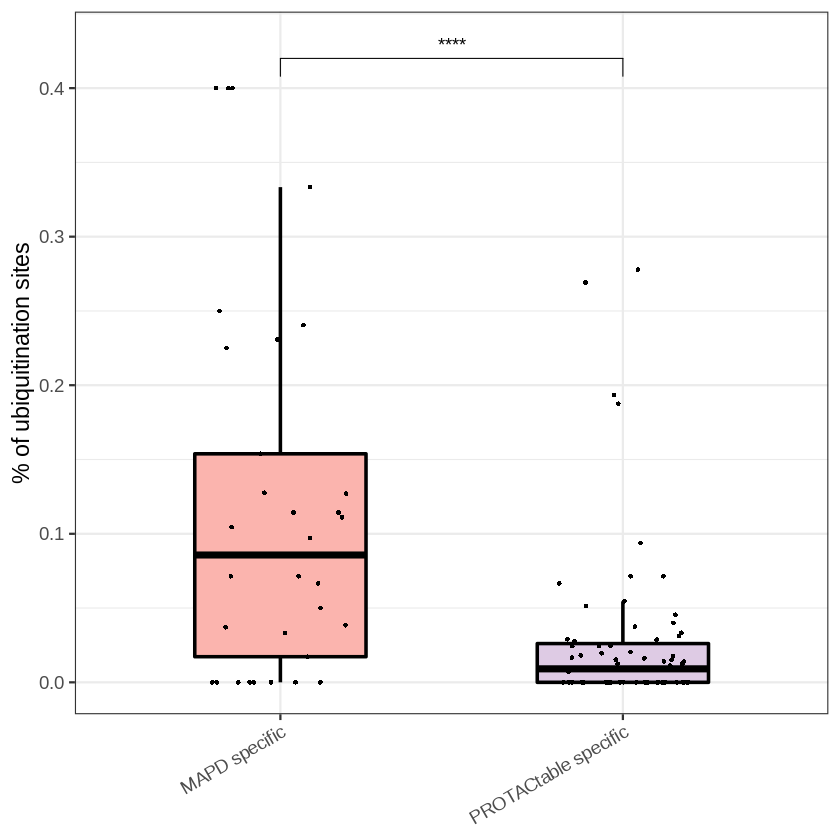

In [9]:
MAPD = rownames(preds)[preds[,1]>=0.2327 & preds$IsKinase=="Yes" & (preds$ChEMBL=="Yes"|preds$Electrophiles>0)]
PROTACtable = rownames(preds)[preds$PROTACtable=="Yes" & preds$IsKinase=="Yes"]
MAPD_specific = setdiff(MAPD, PROTACtable)
PROTACtable_specific = setdiff(PROTACtable, MAPD)

gg = FeatureDat[c(MAPD_specific, PROTACtable_specific), ]
gg$Group = "MAPD specific"
gg$Group[rownames(gg)%in%PROTACtable_specific] = "PROTACtable specific"
gg = gg[gg$Detectability>0.1, ]
gg$Ubiquitination_2[gg$Ubiquitination_2>0.4] = 0.4
p = BoxView(gg, "Group", "Ubiquitination_2", comparisons = list(c("MAPD specific", "PROTACtable specific")),
            fill = c("#fbb4ae", "#decbe4"), xlab = NULL, ylab = "% of ubiquitination sites", add.jitter = TRUE)
p = p + theme(axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1))
p = p + ylim(NA, 0.43)
p

In [10]:
colnames(preds)

[1] "MAPD.score"            "Feature.completeness"  "Max.degradation"      
 [4] "Uniq.DegradeFreq"      "IsKinase"              "PROTACdb"             
 [7] "PROTACpedia"           "Multi.kinase.degrader" "PROTACtable"          
[10] "DrugBank"              "ChEMBL"                "Electrophiles"        
[13] "TF"                    "Oncogene"              "Clinvar"

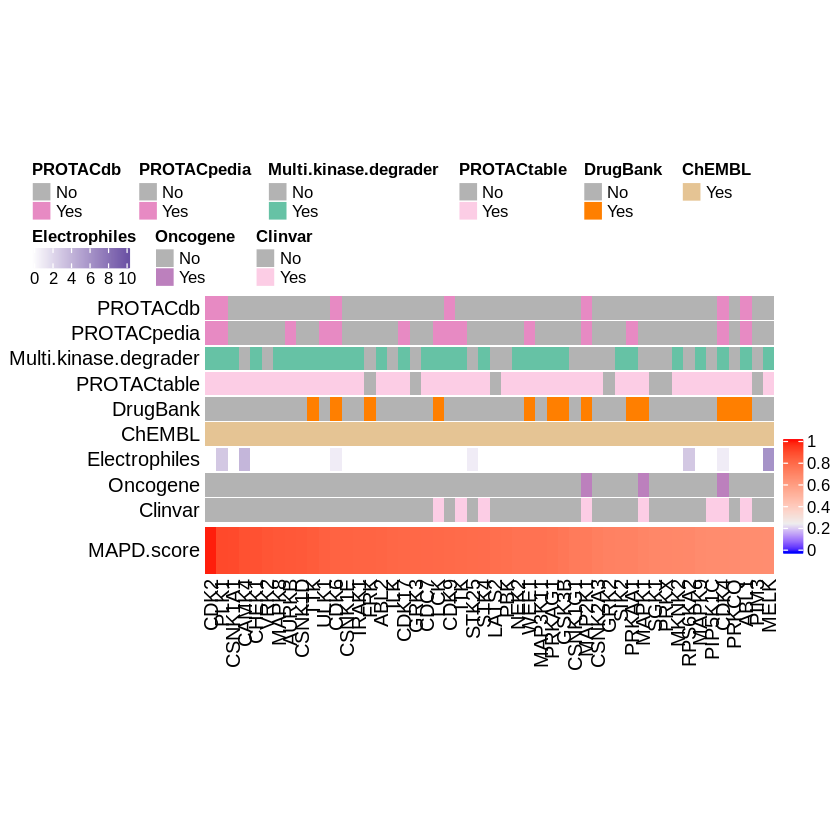

In [11]:
KinGG = preds[preds$IsKinase=="Yes", ][1:50, -c(2:5,13)]

col = circlize::colorRamp2(c(0, 0.25, 1), c("blue", "#EEEEEE", "red"))
ha = HeatmapAnnotation(df = KinGG[,-1], annotation_name_side = "left",
                       col = list("PROTACdb" = c("Yes" = "#e78ac3", "No" = "#b3b3b3"),
                                  "PROTACpedia" = c("Yes" = "#e78ac3", "No" = "#b3b3b3"),
                                  "Multi.kinase.degrader" = c("Yes" = "#66c2a5", "No" = "#b3b3b3"),
                                  "PROTACtable" = c("Yes" =  "#fccde5", "No" = "#b3b3b3"),
                                  "DrugBank" = c("Yes" =  "#ff7f00", "No" = "#b3b3b3"),
                                  "ChEMBL" = c("Yes" =  "#e5c494", "No" = "#b3b3b3"),
                                  "Electrophiles" = circlize::colorRamp2(seq(0, 10, length = 2), c("white", "#6a51a3")),
                                  "TF" = c("Yes" =  "#80b1d3", "No" = "#b3b3b3"),
                                  "Oncogene" = c("Yes" =  "#bc80bd", "No" = "#b3b3b3"),
                                  "Clinvar" = c("Yes" =  "#fccde5", "No" = "#b3b3b3")),
                      annotation_legend_param = list("Electrophiles" = list(direction = "horizontal")))
p = Heatmap(t(KinGG[,1,drop=FALSE]), col = col, name = " ", row_names_side = "left", 
            cluster_columns = FALSE, top_annotation = ha, height = unit(1, "cm"))
draw(p, annotation_legend_side = "top")